In [1]:
import sys
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# add parent folder of notebook to path
sys.path.append(os.path.abspath(".."))



In [2]:
import Pipeline.results 
import importlib
from utils.helperfunctions import plot_roc_curve, logRegOddsRatios

Decision Tree predicts Team A wins 57.32%, Team B wins 42.68%
LogReg predicts Team A wins 50.24%, Team B wins 49.76%
SVM predicts Team A wins 43.17%, Team B wins 56.83%
MLP predicts Team A wins 47.32%, Team B wins 52.68%


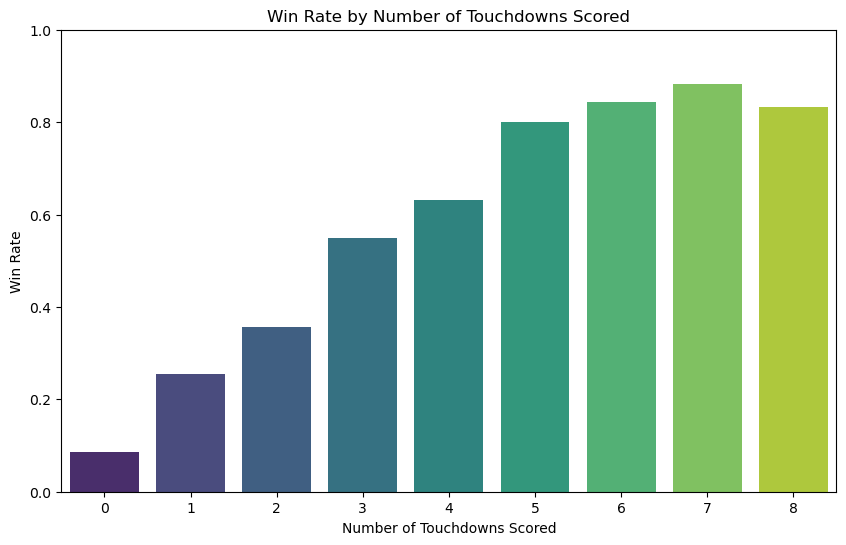

In [3]:
plt.figure(figsize=(10,6))
sns.barplot(data=Pipeline.results.touchdown_win, x='Touchdown', y='Win', palette='viridis')
plt.xlabel('Number of Touchdowns Scored')
plt.ylabel('Win Rate')
plt.title('Win Rate by Number of Touchdowns Scored')
plt.ylim(0,1)
plt.show()

In [4]:
Pipeline.results.prediction.to_csv("../Prediction.csv", index=False)



In [5]:
df = pd.read_csv("../Prediction.csv")
df

,posteam_A,Season_A,posteam_B,Season_B,proba_A_wins,winner,predicted_winner_team
0,GB,2011,SF,2011,0.323325,B,SF
1,NE,2016,NO,2009,0.530181,A,NE
2,NO,2009,DEN,2012,0.346879,B,DEN
3,NE,2010,ATL,2016,0.478420,B,ATL
4,CAR,2015,IND,2009,0.519906,A,CAR
5,IND,2009,NE,2016,0.303723,B,NE
6,SF,2011,NE,2011,0.528395,A,SF
7,NE,2011,DEN,2012,0.279139,B,DEN
8,DEN,2012,NE,2011,0.471781,B,NE
9,ATL,2016,IND,2009,0.646948,A,ATL


In [6]:
Pipeline.results.Bestmatchup

,posteam_A,Season_A,posteam_B,Season_B,InterceptionThrown,InterceptionThrown_B,Fumble,Fumble_B,Touchdown,Touchdown_B,...,PassAttempt,PassAttempt_B,CompletedPasses,CompletedPasses_B,CompletionPercentage,CompletionPercentage_B,Yards.Gained,Yards.Gained_B,win,win_B
0,GB,2011,SF,2011,0.6250,0.3750,0.6875,1.0000,3.8125,2.1875,...,35.3125,29.8125,23.1875,18.0000,0.641801,0.610676,475.0000,401.7500,0.8125,0.8125
1,NE,2016,NO,2009,0.1250,0.8125,1.4375,1.5625,3.2500,3.8750,...,36.8750,35.3750,23.8750,24.1250,0.642576,0.681609,448.3750,523.9375,0.8125,0.8125
2,NO,2009,DEN,2012,0.8125,0.7500,1.5625,1.1250,3.8750,3.4375,...,35.3750,38.8125,24.1250,25.7500,0.681609,0.670930,523.9375,460.1875,0.8125,0.8125
3,NE,2010,ATL,2016,0.3125,0.5000,0.4375,0.5625,3.6250,3.7500,...,33.5625,35.4375,21.5000,24.1875,0.645250,0.682063,456.6250,474.1250,0.8125,0.7500
4,CAR,2015,IND,2009,0.6875,1.2500,0.9375,0.7500,3.5625,3.2500,...,32.9375,39.2500,19.0625,25.6250,0.580476,0.653875,424.3750,466.0000,0.8125,0.8125
5,IND,2009,NE,2016,1.2500,0.1250,0.7500,1.4375,3.2500,3.2500,...,39.2500,36.8750,25.6250,23.8750,0.653875,0.642576,466.0000,448.3750,0.8125,0.8125
6,SF,2011,NE,2011,0.3750,0.8125,1.0000,0.8125,2.1875,3.6875,...,29.8125,40.0625,18.0000,25.6875,0.610676,0.639820,401.7500,513.9375,0.8125,0.8125
7,NE,2011,DEN,2012,0.8125,0.7500,0.8125,1.1250,3.6875,3.4375,...,40.0625,38.8125,25.6875,25.7500,0.639820,0.670930,513.9375,460.1875,0.8125,0.8125
8,DEN,2012,NE,2011,0.7500,0.8125,1.1250,0.8125,3.4375,3.6875,...,38.8125,40.0625,25.7500,25.6875,0.670930,0.639820,460.1875,513.9375,0.8125,0.8125
9,ATL,2016,IND,2009,0.5000,1.2500,0.5625,0.7500,3.7500,3.2500,...,35.4375,39.2500,24.1875,25.6250,0.682063,0.653875,474.1250,466.0000,0.7500,0.8125


In [7]:
Pipeline.results.results

[('Decision Tree accuracy', 0.6609756097560976),
 ('LogReg accuracy:', 0.6585365853658537),
 ('SVM accuracy:', 0.6658536585365854),
 ('Best MLP accuracy out of 10 tries:', 0.6146341463414634)]

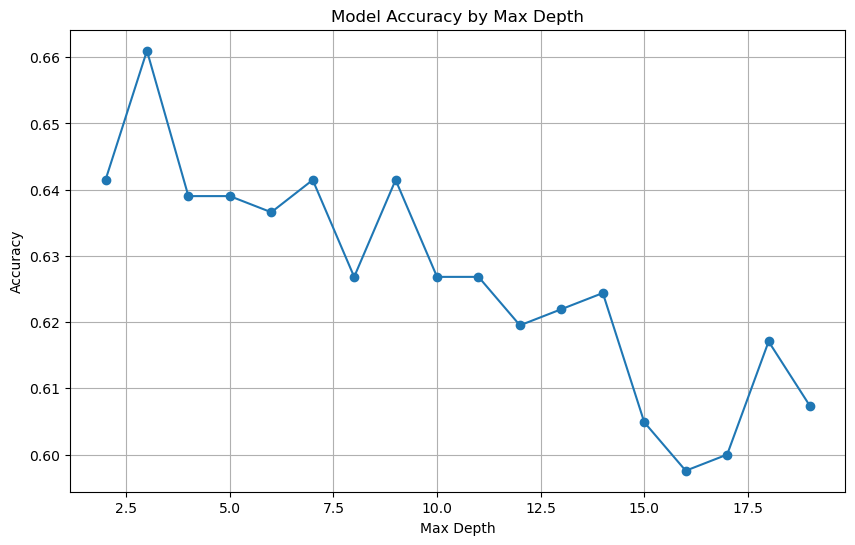

In [8]:
plt.figure(figsize=(10,6))
depths = list(range(2,20))
accuracies = []
for x in depths:
    model = DecisionTreeClassifier(max_depth=x, random_state=42)
    model.fit(Pipeline.results.X_train_scaled, Pipeline.results.y_train)
    acc = accuracy_score(Pipeline.results.y_test, model.predict(Pipeline.results.X_test_scaled))
    accuracies.append(acc)
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Max Depth')
plt.grid(True)
plt.show()

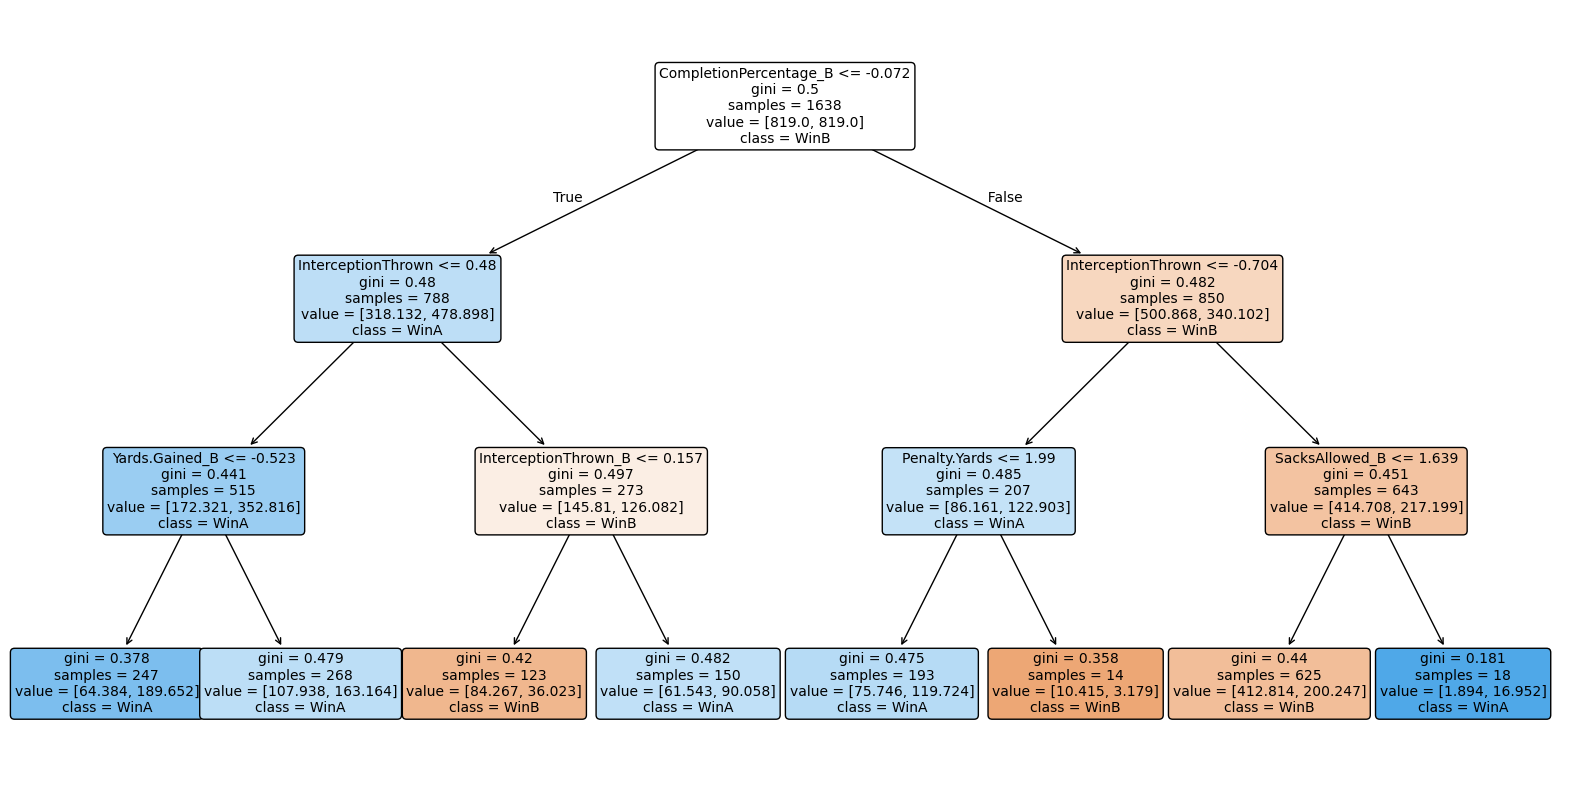

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # Adjust the size as needed
plot_tree(
    Pipeline.results.tree,
    feature_names=Pipeline.results.train_cols,
    class_names=['WinB', 'WinA'],
    filled=True,             # Colors nodes by class
    rounded=True,
    fontsize=10
)
plt.show()


In [10]:
feature_importances = pd.Series(Pipeline.results.tree.feature_importances_, index=Pipeline.results.train_cols)
feature_importances = feature_importances.sort_values(ascending=False)

print(feature_importances)

InterceptionThrown        0.347329
CompletionPercentage_B    0.320261
SacksAllowed_B            0.121707
InterceptionThrown_B      0.118045
Yards.Gained_B            0.055694
Penalty.Yards             0.036963
SacksAllowed              0.000000
FGMade                    0.000000
CompletedPasses_B         0.000000
PassAttempt_B             0.000000
FirstDown_B               0.000000
PuntBlocked_B             0.000000
Penalty.Yards_B           0.000000
PuntBlocked               0.000000
Fumble_B                  0.000000
Fumble                    0.000000
Yards.Gained              0.000000
CompletionPercentage      0.000000
CompletedPasses           0.000000
PassAttempt               0.000000
FirstDown                 0.000000
FGMade_B                  0.000000
dtype: float64


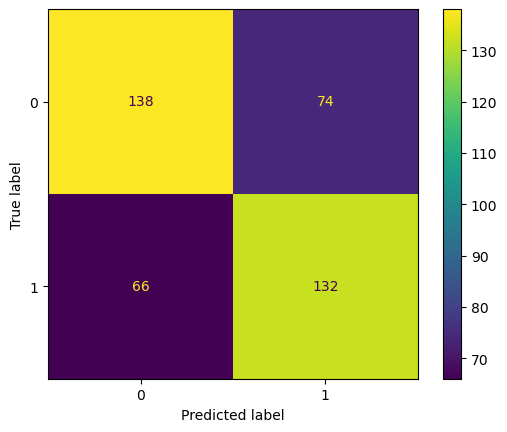

In [11]:
cm = confusion_matrix(Pipeline.results.y_test, Pipeline.results.y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

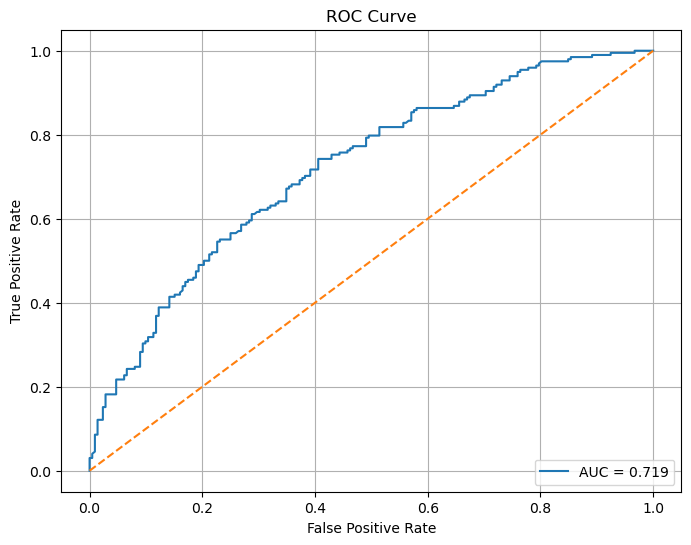

In [12]:
plot_roc_curve( Pipeline.results.best_model, Pipeline.results.X_test_scaled, Pipeline.results.y_test)

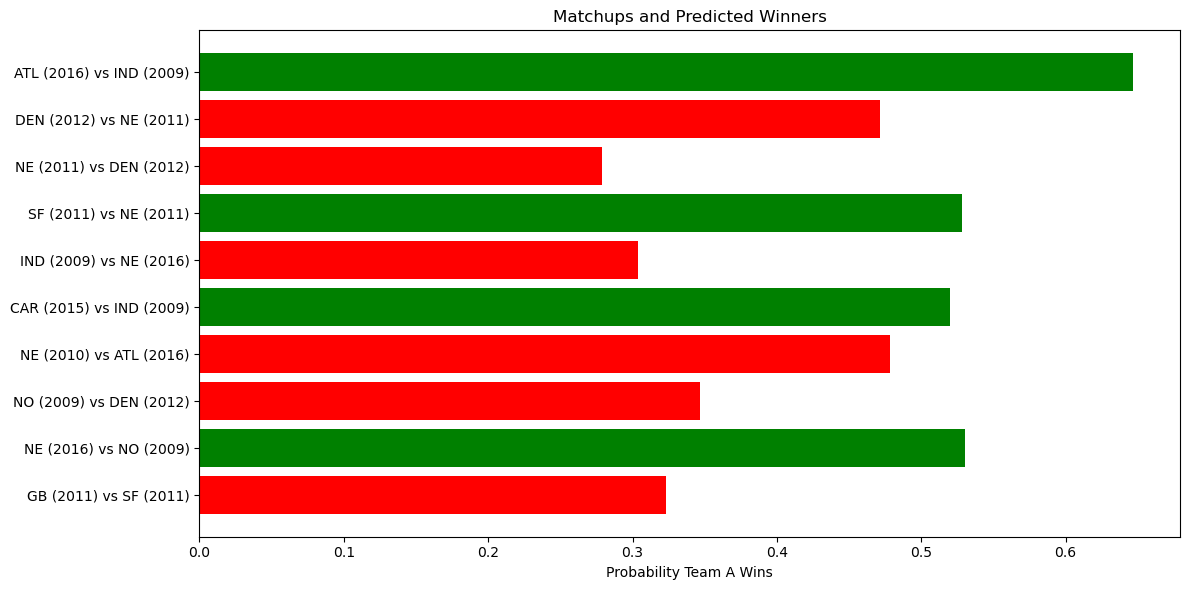

In [13]:




df['matchup'] = df['posteam_A'] + " (" + df['Season_A'].astype(str) + ") vs " + \
                df['posteam_B'] + " (" + df['Season_B'].astype(str) + ")"

plt.figure(figsize=(12, 6))
plt.barh(df['matchup'], df['proba_A_wins'])

# Color bars by predicted winner
colors = ['green' if w == 'A' else 'red' for w in df['winner']]
plt.barh(df['matchup'], df['proba_A_wins'], color=colors)

plt.xlabel("Probability Team A Wins")
plt.title("Matchups and Predicted Winners")
plt.tight_layout()
plt.show()


In [14]:
Pipeline.results.train_cols

['InterceptionThrown',
 'Fumble',
 'FGMade',
 'Penalty.Yards',
 'PuntBlocked',
 'SacksAllowed',
 'FirstDown',
 'PassAttempt',
 'CompletedPasses',
 'CompletionPercentage',
 'Yards.Gained',
 'InterceptionThrown_B',
 'Fumble_B',
 'FGMade_B',
 'Penalty.Yards_B',
 'PuntBlocked_B',
 'SacksAllowed_B',
 'FirstDown_B',
 'PassAttempt_B',
 'CompletedPasses_B',
 'CompletionPercentage_B',
 'Yards.Gained_B']

In [15]:

logRegOddsRatios(Pipeline.results.best_model, Pipeline.results.train_cols)


,feature,coefficient,odds_ratio
9,CompletionPercentage,0.407514,1.503077
7,PassAttempt,0.311511,1.365487
11,InterceptionThrown_B,0.292197,1.339367
18,PassAttempt_B,0.284440,1.329018
16,SacksAllowed_B,0.277550,1.319892
12,Fumble_B,0.103646,1.109208
2,FGMade,0.080694,1.084039
14,Penalty.Yards_B,0.036553,1.037229
10,Yards.Gained,0.019791,1.019988
15,PuntBlocked_B,0.019562,1.019755
